# <div align="center">  Artificial Intelligence Concordia Workshop 1: <br /> </div>
## <div align="center"> Logistic Regression</div>

<div align="center">
  <img src="https://github.com/olibel270/Workshop1JupyterNote/blob/master/images/AICLogo.jpg?raw=1" style="width: 300px" /></div>

---------------------------------------------------------------------

<div align="right">
  Follow us on:<br />
[ Facebook](https://www.facebook.com/AISConU/)<br />
[Our Website](https://www.aisconcordia.com)<br />
  </div>
 


## Logistic Regression

Logistic Regression is generally used for **classification** and not regression. 

Unlike Linear Regression, the output can take a limited number of values only i.e, the **output is categorical** (discrete).

When the number of possible outcomes is only two it is called **Binary Logistic Regression**.

Linear Regression just takes the weighted sum of inputs to get the outputs. There is no restriction on the value it computes.
For a binary classification, we want a value between 0 and 1 to map it as a probability and determine the output class. 
That’s why Linear Regression can’t be used for classification tasks.

An activation function called the sigmoid function is used for this transformation to a probability.

The sigma function $ \sigma(z)  $ is given by :

$$ \sigma(z) = \frac{1}{1+e^{-z}} $$


The plot of the sigmoid function looks like this :

![sigmoid function](https://cdn-images-1.medium.com/max/1600/1*yKvimZ3MCAX-rwMX2n87nw.png)

* The value of the sigmoid function always lies between 0 and 1. 
* The value is exactly 0.5 at z = 0. 

Therefore, we can use 0.5 as the probability threshold to determine the classes. 

If the probability is greater than 0.5, we classify it as Class-1 (y=1) or else as Class-0 (y=0).

## Dataset

* The data consists of marks of two exams for 100 applicants. 
* The target value takes on binary values 1 or 0. 
* 1 means the applicant was admitted to the university 
   0 means the applicant was rejected. 
   
   The objective is to build a classifier that can predict whether an application will be admitted to the university or not.

In [0]:
# imports
import numpy as np
from scipy.optimize import fmin_tnc
import matplotlib.pyplot as plt
import pandas as pd


## Loading the dataset

In [0]:
# Function to load csv data into Pandas data frame

def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

In [0]:
def get_data():
  # load the data from the file
  data = load_data("marks.csv", None)

  # X = feature values, all the columns except the last column
  x = data.iloc[:, :-1]

  # y = target values, last column of the data frame
  y = data.iloc[:, -1]
  
  x_train, y_train = x[:70], y[:70]
  x_test, y_test = x[-30:], y[-30:]
  
  return x_train, y_train, x_test, y_test

In [359]:
x_train, y_train, x_test, y_test = get_data()

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("x_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (70, 2)
y_train shape =  (70,)
x_test shape =  (30, 2)
y_test shape =  (30,)


## Visualizing the dataset

In [0]:
def visualize_data(x,y):
  # filter out the applicants that got admitted
  admitted = x[y == 1]

  # filter out the applicants that din't get admission
  not_admitted = x[y == 0]

  # plots
  plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], label='Admitted',color='g')
  plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], label='Not Admitted',color='r')
  plt.legend()
  plt.xlabel('Marks in Subject 1')
  plt.ylabel('Marks in Subject 2')
  plt.show()

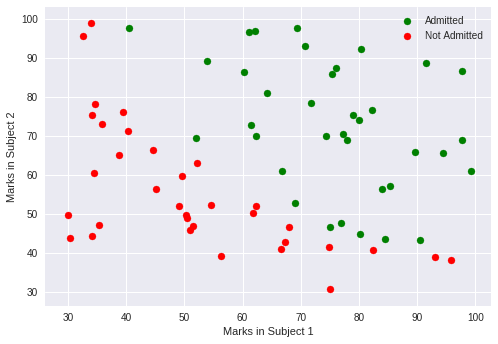

In [361]:
visualize_data(x_train,y_train)

## Hypothesis function

For logistic regression, the assumed hypthesis function is :

$$ h(x) = \sigma(\theta^T x)$$



If the weighted sum of inputs is greater than zero, the predicted class is 1 and vice-versa. So the decision boundary separating both the classes can be found by setting the weighted sum of inputs to 0.



Using the sigma function $ \sigma(\theta^T)  $ is given by :

$$ h(x) = \frac{1}{1+e^{-\theta^Tx}} $$


In [0]:
def transform_data(x,y):
  # Adding a column of ones for the bias term
  X = np.c_[np.ones((x.shape[0], 1)), x]

  # Converting vector y to a   n x 1  matrix
  Y = y.reshape(y.shape[0],1)
  
  return X,Y

In [0]:
def sigmoid(X):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-X))

def linear_output(theta, X):
    # Computes the weighted sum of inputs
    return np.dot(X, theta)

def probability(theta, X):
    # Returns the probability after passing through sigmoid
    return sigmoid(linear_output(theta, X))

<center>
![alt text](https://cdn-images-1.medium.com/max/1600/1*qKfAYUsI0VPcIXVBbEdPEg.png)

  </center>

Define **cross-entropy loss** :

$$  cost(h(x),y) = - y log((h(x))) - (1 - y) log(1 - h(x)) $$

In [0]:
def cost_function(theta, X, Y):
    # Computes the cost function : cross-entropy loss for all the training samples
    n = X.shape[0]
    total_cost = -(1 / n) * np.sum(Y * np.log(probability(theta, X)) + (1 - Y) * np.log(1 - probability(theta, X)))
    return total_cost

In [0]:
def gradient(theta, X, Y):
    # Computes the gradient of the cost function at the point theta
    n = X.shape[0]
    return (1 / n) * np.dot(X.T, sigmoid(linear_output(theta,   X)) - Y)

In [0]:
def fit(X, Y):
    # Initialization for the parameter vector theta = [theta_0  theta_1 theta_2]
    theta = np.zeros((X.shape[1],1))
    optimal_weights = fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(X, Y.flatten()))
    return optimal_weights[0]

## Training

In [379]:
X_train,Y_train = transform_data(x_train,y_train)
parameters = fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [380]:
# Print the learned parameters 
parameters

array([-24.81883979,   0.20851233,   0.18648858])

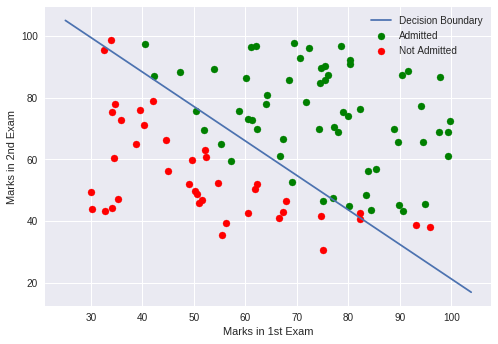

In [381]:
x_values = [np.min(x[:, 1] - 5), np.max(x[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], label='Admitted',color='g')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], label='Not Admitted',color='r')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

In [0]:
def predict(X, theta):
    return probability(theta, X)
 

In [0]:
def accuracy(X, actual_classes, theta, probab_threshold=0.5):
    predicted_classes = (predict(X, theta) >= probab_threshold).astype(int)
#     predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100

In [397]:
# Training accuracy
accuracy(X_train, Y_train.flatten(), parameters)

91.42857142857143

In [398]:
# Test accuracy
X_test,Y_test = transform_data(x_test,y_test)
accuracy(X_test, Y_test.flatten(), parameters)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


86.66666666666667

## SK Learn Implementation

In [386]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

model = LogisticRegression()
model.fit(X_train, Y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(Y_test,predicted_classes)
sklearn_parameters = model.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [387]:
print("SkLearn Parameters = ",sklearn_parameters)
print("SkLearn Test accuracy = ",accuracy)

SkLearn Parameters =  [[-2.49963354  0.04809157  0.03397794]]
SkLearn Test accuracy =  0.8666666666666667
